# Lieveheersbeestjes en luizenplagen: een dynamisch wereldbeeld met differentiaalvergelijkingen

Het vorig hoofdstuk was onze eerste kennismaking met (groei)modellen. Realistisch of niet, deze werden gekarakteriseerd doordat ze discreet in de tijd waren: de tijd tikte generatie per generatie voorbij. In de praktijk ervaren we tijd echter als continu: tussen vandaag en morgen zitten een oneindig aantal individuele momenten. Vandaar dat wetenschappers de realiteit vaak beschrijven door een krachtiger model: de **differentiaalvergelijking**. De oplossing van een dergelijke differentiaalvergelijking is dan geen getal, maar een functie die het systeem beschrijft doorheen de tijd. Differentiaalvergelijkingen worden doorgaans pas gegeven na een stevige wiskundebasis. In dit hoofdstuk geven we een eerste introductie tot differentiaalvergelijkingen, met als doel een populatie bladluizen en lieveheersbeestjes te beschrijven.

## Biologische bestrijding met lieveheersbeestjes

Waar rupsen ware monsters zijn die bladeren van planten opeten en gewassen op die manier aantasten, zijn bladluizen meer verfijnd. Met hun naaldvormig mondstuk zuigen ze het sap van een plant rechtstreeks uit het vaatweefsel. Dit sap bevat voornamelijk suikers, en relatief weinig aminozuren die de luizen ook nodig hebben. Daarom scheiden de luizen het sap grotendeels terug uit, ontdaan van de meeste aminozuren; deze substantie wordt honingdauw genoemd. Hoewel honingdauw een belangrijke voedingsbron voor mieren en wespen is, kan deze substantie ook schadelijke schimmels aantrekken. Bovendien onttrekken luizen via het vaatweefsel niet alleen de kostbare suikers van de plant, maar ook gevaarlijke plantenvirussen die zich op deze manier verder kunnen verspreiden. Daarom zijn luizen erg vervelende beestjes voor vele soorten gewassen, zoals aardappelen, bonen en rozen.

![Bladluis](files/bladluis.jpg "https://commons.wikimedia.org/wiki/File:Aphids_May_2010-2.jpg")

Omdat luizen zo schadelijk zijn, bestaan er verschillende chemische verdelgingsmiddelen. Deze behandeling kan er evenwel voor zorgen dat er schadelijke stoffen in de gewassen en de bodem terechtkomen, die slecht zijn voor mens en natuur. Daarom wordt er ook vaak een biologische bestrijding toegepast: bladluizen zijn immers smakelijk voedsel voor vele andere insecten en vogels. Het lieveheersbeestje in het bijzonder is een echte moordmachine voor bladluizen. Larven alleen al eten zo'n 400 bladluizen, terwijl een volwassen lieveheersbeestje maar liefst 5000 luizen kan verorberen. Men kan daarom de larven van lieveheersbeestjes kopen om een luizenplaag onder controle te brengen.

![Lieveheersbeestje](files/lieveheersbeestje.jpg "https://upload.wikimedia.org/wikipedia/commons/4/42/Ladybug.jpg")

Wanneer men lieveheersbeestjes introduceert in de omgeving, zullen deze zich verder voortplanten. Een lieveheersbeestje kan op een dag wel 50 eitjes leggen, die eerst larven worden, en zich na ongeveer 20 dagen verpoppen tot nieuwe lieveheersbeestjes. Dit betekent dat de populatie zal aangroeien zolang er voldoende voedsel is. Wanneer er op een gegeven moment te weinig bladluizen over zijn, zal het aantal lieveheersbeestjes weer dalen.

**Om de effecten van biologische bestrijding te modelleren, heb je dus een complexer model nodig dan deze die je hiervoor behandeld hebt**. Je zal namelijk twee toestanden moeten modelleren: het aantal bladluizen en het aantal lieveheersbeestjes.

## Interactieve notebook

Nu ga je aan de slag met een interactieve online notebook, waarin je Python zal gebruiken om de interactie tussen de populatiegroottes van bladluizen en lieveheersbeestjes in kaart te brengen.

[![Knop](files/knop.png "Knop")](https://kiks.ilabt.imec.be/jupyterhub/?id=6010 "Insect Lesliematrix")

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Lieveheersbeestjes en luizenplagen: een dynamisch wereldbeeld met differentiaalvergelijkingen

## Afgeleiden van functies

Bij het modelleren gebruik je functies die een input omzetten naar een output. Beschouw bijvoorbeeld de functie $f$ met voorschrift $f(t) = t sin (t)$. Deze functie zal een reële waarde $t$ omzetten naar $t sin(t)$, waarbij $t$ een hoek (in radialen) is.

Van een afleidbare functie kan je een afgeleide berekenen. Deze afgeleide kan benaderd worden door het differentiequotiënt $f'(t) = \frac{\text{d}f(t)}{\text{d}t}\approx \frac{f(t + \Delta t) - f(t)}{\Delta t}$, waarbij $\Delta t$ bij voorkeur zo klein mogelijk is.

Beschouw de functie $f$ met als functievoorschrift $f(t) = t sin(t)$. In Python kan je deze als volgt definiëren:

In [1]:
# importeer de nodige bibliotheken
import numpy as np


def f(t):
    '''
    Geeft het resultaat van de functie f met als functievoorschrift
    f(t) = t -> t sin(t) terug
    
    Parameters
    ----------
    t: float
        de variabele t
    '''
    
    return t * np.sin(t)

### Opdracht 1

Evalueer het functievoorschrift voor de waarden $t = 1$, $t = \pi$, $t = \frac{3 \pi}{2}$, $t = 2 \pi$, $t = \frac{5 \pi}{2}$, $t = 3 \pi$, $t = \frac{7 \pi}{2}$ en $t = 4 \pi$. Welke waarden bekom je?

In [2]:
print(f(1))
print(f(np.pi))
print(f(3 * np.pi / 2))
print(f(2 * np.pi))
print(f(5 * np.pi / 2))
print(f(3 * np.pi))
print(f(7 * np.pi / 2))
print(f(4 * np.pi))

0.8414709848078965
3.8473413874435795e-16
-4.71238898038469
-1.5389365549774318e-15
7.853981633974483
3.4626072486992214e-15
-10.995574287564276
-6.155746219909727e-15


Aan de hand van volgende code kan je de grafiek van deze functie genereren:

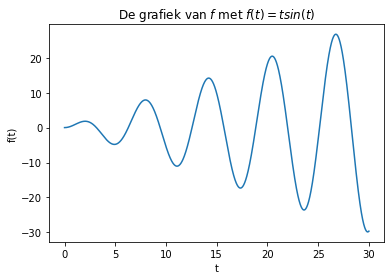

In [3]:
# importeer de nodige bibliotheken
from matplotlib import pyplot as plt

# itereer over alle waarden van 0 tot 30 met tussenstappen van 0,01
data_t = np.arange(0, 30.005, 0.01)

# bereken het resultaat van de functie voor alle beschouwde waarden
data_y = f(data_t)

# maak een nieuwe grafiek aan
plt.figure()

# plot alle punten
plt.plot(data_t, data_y)

# breng verduidelijkende labels aan
plt.xlabel('t')
plt.ylabel('f(t)')

# voeg een titel toe
plt.title('De grafiek van $f$ met $f(t) = t sin(t)$')

# toon de grafiek
plt.show()

### Opdracht 2

Bereken op basis van bovenstaande formule een schatting voor het differentiequotiënt in $t = 2$, waarbij je $\Delta t = 0.1$ stelt.

$f(2) = 2 sin(2) \approx 1.8186$

$f(t + \Delta t) = f(2.1) = 2.1 sin(2.1) \approx 1.8127$

$f(t + \Delta t) - f(t) \approx 1.8127 - 1.8186 = -0.0059$

$\frac{f(t + \Delta t) - f(t)}{\Delta t} \approx \frac{-0.0059}{0.1} = -0.059$

De formule die hier gebruikt wordt om de afgeleide te bepalen wordt de **eindige differentiemethode** genoemd. Ze is zeer eenvoudig te implementeren:

In [4]:
def differentiequotient(f, t, delta_t):
    '''
    Geeft het differentiequotiënt terug van de functie f voor de waarde t,
    waarbij het tijdsinterval delta_t gegeven is
    
    Parameters
    ----------
    f: function
        de functie f
    t: float
        de variabele t
    delta_t: float
        het tijdsinterval
    
    Output
    ------
    float
        het differentiequotiënt
    '''
    
    return (f(t + delta_t) - f(t)) / delta_t

In [5]:
print(differentiequotient(f, 2, 0.1))

-0.05855183688728616


Wat gebeurt er als je een kleinere waarde beschouwt voor $\Delta t$?

In [6]:
print(differentiequotient(f, 2, 0.01))

0.06371786322902917


En nog kleiner?

In [7]:
print(differentiequotient(f, 2, 0.001))

0.07567799367991235


Wanneer je kleinere stapjes neemt, neemt de absolute waarde van het verschil $f(t + \Delta t) - f(t)$ typisch af, maar deel je ook door een steeds kleiner getal. Wanneer je de limiet van $\Delta t$ naar 0 beschouwt, convergeert de benadering naar de echte afgeleide $f'(t)$:

$$f'(t) = \lim\limits_{\Delta t \to 0} \frac{f(t + \Delta t) - f(t)}{\Delta t}$$

De afgeleide functie van $f$ met $f(t) = t sin(t)$ is gelijk aan $f'$ met $f'(t) = t cos(t) + sin(t)$, waarvan de grafiek hier wordt weergegeven samen met enkele benaderingen:

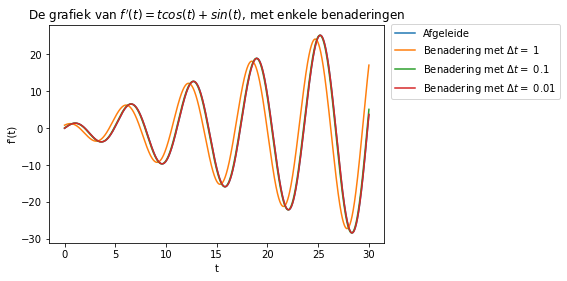

In [8]:
# itereer over alle waarden van 0 tot 30 met tussenstappen van 0,01
data_x = np.arange(0, 30.005, 0.01)

# bereken de afgeleide voor alle beschouwde waarden
data_y = data_x * np.cos(data_x) + np.sin(data_x)

# maak een nieuwe grafiek aan
plt.figure()

# plot alle punten
plt.plot(data_x, data_y, label='Afgeleide')

# bereken het differentiequotiënt voor verschillende delta_t
for delta_t in [1, 0.1, 0.01]:
    data_y = differentiequotient(f, data_x, delta_t)
    plt.plot(data_x, data_y, label=f'Benadering met $\Delta t =$ {delta_t}')

# voeg een legende toe
plt.legend(loc='upper right', bbox_to_anchor=(1.54, 1.027))

# breng verduidelijkende labels aan
plt.xlabel('t')
plt.ylabel('f\'(t)')

# voeg een titel toe
plt.title('De grafiek van $f\'(t) = t cos(t) + sin(t)$, met enkele benaderingen')

# toon de grafiek
plt.show()

Stel vast dat je de afgeleide inderdaad kunt benaderen met de eindige differentiemethode, en dit bij voorkeur met een zo klein mogelijke $\Delta t$.

### Opdracht 3

Eerder leerde je al dat het functieverloop stijgt daar waar de afgeleide positief is, en dat deze daalt wanneer de afgeleide negatief is. Bereken de waarde van de afgeleide functie $f'$ voor de waarden $t = 1$, $t = \pi$, $t = \frac{3 \pi}{2}$, $t = 2 \pi$, $t = \frac{5 \pi}{2}$, $t = 3 \pi$, $t = \frac{7 \pi}{2}$ en $t = 4 \pi$. Controleer visueel of de bekomen waarde voldoet aan je verwachting, gelet op de grafieken hierboven.

## Terug naar de insecten

Je zal het concept van afgeleiden nu gebruiken om de verandering van de populatiegrootte van bladluizen en lieveheersbeestjes te beschrijven, waarbij de ene populatiegrootte een rechtstreekse impact heeft op de andere. Hiervoor zal je een vergelijking gebruiken waarbij zowel een functie als haar afgeleide voorkomt; dit wordt een **differentiaalvergelijking** genoemd.

Eigen aan differentiaalvergelijkingen is dat de afgeleide van een functie, genoteerd als $\dot{y}$, geschreven kan worden als een functie van de originele functie $y$ op een specifiek moment in de tijd $t$:

$$\dot{y} = f(y, t)$$

Specifiek gericht op het probleem met bladluizen, kan je de groei van de populatiegrootte van luizen als volgt beschrijven:

$$\dot{y} = ry \left(1 - \frac{y}{K}\right)$$

Hierbij stellen $r = a - 1$ het groeipercentage en $K$ de draagkracht voor (beide strikt positieve constanten), en stelt $y$ de populatiegrootte voor. $\dot{y}$ is dan de afgeleide van $y$, die je iets vertelt over de verandering van de populatiegrootte:

- Wanneer $\dot{y} > 0$, zal de populatiegrootte stijgen
- Wanneer $\dot{y} < 0$, zal de populatiegrootte dalen
- Wanneer $\dot{y} = 0$, zal er geen verandering zijn en blijft de populatiegrootte constant

Belangrijk is dus om vast te stellen dat $\dot{y}$ de verandering (groei/afname) van de populatiegrootte beschrijft, en niet de populatiegrootte zelf!

Je kunt je de vraag stellen wanneer het systeem in evenwicht is, en de populatiegrootte dus constant blijft. In dat geval moet je volgende vergelijking oplossen:

$$\dot{y} = 0 \iff ry \left(1 - \frac{y}{K}\right) = 0 \iff ry = 0 \lor 1 - \frac{y}{K} = 0 \iff y = 0 \lor y = K$$

In het eerste geval zijn er geen bladluizen, in het tweede geval wordt de draagkracht $K$ bereikt (zie eerder).

De bedoeling is nu om het verloop van de populatiegrootte te kunnen beschrijven doorheen de tijd. Hiervoor kan je de **methode van Euler** gebruiken, die toelaat om een numerieke oplossing te berekenen van een differentiaalvergelijking met beginvoorwaarden. Herinner je dat je de afgeleide van een functie als volgt kan benaderen:

$$f'(t) \approx \frac{f(t + \Delta t) - f(t)}{\Delta t}$$

met $\Delta t$ zo klein mogelijk. Je vindt dan dat:

$$f(t + \Delta t) \approx f(t) + \Delta t \cdot f'(t)$$

In het beschouwde geval stelt $y = f(t)$ de populatiegrootte voor, en $\dot{y} = f'(t)$ de verandering van deze grootte. Gelet op de gegeven differentiaalvergelijking, kan je $\dot{y}$ als volgt definiëren:

In [9]:
def groei_bladluizen(y, a=1.6, K=10000):
    '''
    Geeft de groei van de populatiegrootte van luizen terug
    
    Parameters
    ----------
    y: float
        de populatiegrootte
    a: float
        de groeifactor
    K: int
        de draagkracht
    
    Output
    ------
    float
        de groei van de populatiegrootte
    '''
    
    return (a - 1) * y * (1 - y / K)

Wanneer je de populatiegrootte $f(t_0) = y_0$ kent op een gegeven moment in de tijd, dan kan je deze informatie gebruiken om $f(t_0 + \Delta t)$ te benaderen:

$$f(t_0 + \Delta t) \approx f(t_0) + \Delta t \cdot f'(t_0)$$

Op basis van dit resultaat kan je dan een tweede benadering maken:

$$f(t_0 + 2 \Delta t) \approx f(t_0 + \Delta t) + \Delta t \cdot f'(t_0 + \Delta t)$$

Hierna doe je hetzelfde voor $f(t_0 + 3 \Delta t)$, $f(t_0 + 4 \Delta t)$, enzovoort. Je kan dus stap voor stap nieuwe functiewaarden gaan benaderen op basis van de vorige schatting en de afgeleide van de functie!

Bekijk eens wat er gebeurt indien je tien tijdsstappen zet met $f(t_0) = y_0 = 500$ en $\Delta t = 0{,}1$:

In [10]:
y = y_0 = 500
delta_t = 0.1
print(y)
for _ in range(10):
    y += delta_t * groei_bladluizen(y)
    print(y)

500
528.5
558.5341265
590.1744118672093
623.495041560705
658.5722676532425
695.4842991221055
734.3111666074797
775.1345592675018
818.0376313137269
863.1047757950784


Stel vast dat de populatiegrootte $y$ toeneemt doorheen de tijd.

Beschouw nu de functie <em>methode_van_euler</em>, die als input de afgeleide functie $f'$, de startwaarde $y_0$, het tijdsinterval $t_{interval}$ en de grootte van de tijsstappen $\Delta t$ als input heeft, en een lijst van tijdsstappen en bijhorende functiewaarden teruggeeft:

In [11]:
def methode_van_euler(f_diff, y_0, t_interval, delta_t):
    '''
    Berekent een schatting van de functiewaarden in [0, t_interval]
    met tussenstappen van delta_t, voor de afgeleide functie f_diff
    en y_0 als startwaarde
    
    Parameters
    ----------
    f_diff: function
        de afgeleide van de functie f
    y_0: float
        de startwaarde
    t_interval: float
        het beschouwde tijdsinterval
    delta_t: float
        de grootte van de tijdsstappen
    
    Output
    -------
    array
        een lijst van tijdstippen
    array
        een lijst met corresponderende schattingen van de functiewaarden
    '''
    
    # bereken het totale aantal schattingen
    n_steps = int(t_interval / delta_t)
    
    # itereer over alle waarden van 0 tot t_interval met tussenstappen van delta_t
    data_t = np.arange(0, t_interval + delta_t / 2, delta_t)
    
    # bereken de geschatte resultaten
    data_y = [y_0]
    for _ in range(n_steps):
        y = data_y[-1]
        data_y.append(y + delta_t * f_diff(y))
    
    # geef beide lijsten terug
    return data_t, data_y

### Opdracht 4

Je kan deze benaderingen nu plotten in een gegeven interval. Bereken de populatiegrootte gedurende 40 opeenvolgende dagen met een tijdsstap van 0.1. Plot de populatiegrootte als een functie van de tijd, met een geschikt label op de x- en y-as.

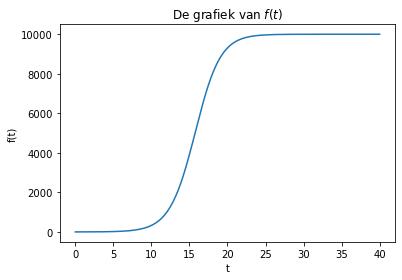

In [12]:
# bereken de functiewaarden met de methode van Euler
data_t, data_y = methode_van_euler(groei_bladluizen, 1, 40, 0.1)

# maak een nieuwe grafiek aan
plt.figure()

# plot alle punten
plt.plot(data_t, data_y)

# breng verduidelijkende labels aan
plt.xlabel('t')
plt.ylabel('f(t)')

# voeg een titel toe
plt.title('De grafiek van $f(t)$')

# toon de grafiek
plt.show()

Stel vast dat de populatiegrootte van de bladluizen stijgt tot aan hun draagcapaciteit, waarna het systeem in evenwicht is. Je wil evenwel vermijden dat je hele tuin leeggegeten wordt, en daarom koop je hongerige lieveheersbeestjes aan die jagen op de luizen. **Er komt dus een tweede variabele in het spel: de populatiegrootte van de lieveheersbeestjes.** Je verkrijgt dan ook twee differentiaalvergelijkingen, die samen een **stelsel van differentiaalvergelijkingen** vormen. Analoog aan de situatie met één variabele, kan je volgende algemene vorm gebruiken:

$$\dot{\mathbf{y}} = f(\mathbf{y}, t)$$

Hierbij schrijf je $\mathbf{y}$ en $\mathbf{\dot{y}}$ in het vet, omdat het **vectoren** zijn, i.e., lijsten met meerdere getallen. In het beschouwde geval stel je dat $\mathbf{y} = (y_1, y_2)$, met $y_1$ en $y_2$ de respectievelijke populatiegrootte van de luizen en de lieveheersbeestjes. Analoog stel je dat $\mathbf{\dot{y}} = (\dot{y_1}, \dot{y_2})$, met $\dot{y_1}$ en $\dot{y_2}$ de respectievelijke groei van beide populaties.

Beschouw volgend concreet stelsel om de groei van de populaties te beschrijven:

$$
\begin{cases}
    \dot{y_1} = (a - 1) y_1 \left(1 - \frac{y_1}{K}\right) - 0.0012 y_1 y_2 \\
    \dot{y_2} = -0.4 y_2 + 0.0005 y_1 y_2
\end{cases}
$$

Dit stelsel wordt een **Lotka-Volterravergelijking** genoemd, dat in de ecologie vaak gebruikt wordt om een dynamisch biologisch systeem te beschrijven waarin zowel een prooi (de bladluis) als een predator (het lieveheersbeestje) voorkomt. Het stelsel bestaat uit twee vergelijkingen, met elk twee termen:

- De verandering van de luizenpopulatie doorheen de tijd $\dot{y_1}$

    - $(a - 1) y_1 \left(1 - \frac{y_1}{K}\right)$ beschrijft de logistische groei van de luizenpopulatie, bepaald door de huidige populatiegrootte $y_1$, de groeifactor $a$ en de draagkracht $K$.
    - $-0.0012 y_1 y_2$ beschrijft de predatie van de lieveheersbeestjes op de luizen. Deze predatie is proportioneel met zowel het aantal luizen als het aantal lieveheersbeestjes: hoe meer luizen er zijn, hoe meer er gevangen kunnen worden, en hoe meer lieveheersbeestjes er zijn, hoe meer zij er kunnen vangen. Merk op dat het model veronderstelt dat deze twee effecten onafhankelijk van elkaar zijn en vermenigdvuldigd kunnen worden.
    
- De verandering van de lieveheersbeestjespopulatie doorheen de tijd $\dot{y_2}$

    - $-0.4 y_2$ beschrijft de netto afsterfte van lieveheersbeestjes: elke dag sterft 40% van de lieveheersbeestjes door ouderdom of externe factoren.
    - $+0.0005 y_1 y_2$ beschrijft opnieuw de predatie van de lieveheersbeestjes op de luizen. Hier zorgt deze voor een positieve bijdrage: de luizen dienen als voedsel dat de lieveheersbeestjes gebruiken om te groeien en te vermenigvuldigen. Ook hier veronderstelt het model dat deze twee effecten onafhankelijk van elkaar zijn en vermenigdvuldigd kunnen worden.
    
Je kunt drie stationaire oplossingen voor deze Lotka-Volterravergelijking bedenken:

- Er zijn geen bladluizen of lieveheersbeestjes

- Er zijn bladluizen, maar geen lieveheersbeestjes om ze op te eten

- Bladluizen en lieveheersbeestjes leven samen

Je zal nu bekijken wat er gebeurt wanneer je lieveheersbeestjes introduceert in een biologisch systeem waarin er enkel bladluizen leven. Veronderstel dat het aantal bladluizen $y_1 = 5000$ de capaciteit $K = 10000$ van je tuin nog niet bereikt heeft, en je op dat moment $y_2 = 2$ lieveheersbeestjes uitzet. Hoe ziet het verloop van beide populaties er dan uit?

In [13]:
def groei_bladluizen(y_1, y_2, a=1.6, K=10000):
    '''
    Berekent de groei van de populatiegrootte van bladluizen
    
    Parameters
    ----------
    y_1: float
        het aantal bladluizen op een welbepaald moment
    y_2: float
        het aantal lieveheersbeestjes op hetzelfde moment
    a: float
        de groeifactor
    K: int
        de draagkracht
    
    Output
    ------
    float
        de groei van de populatiegrootte van bladluizen
    '''
    
    return (a - 1) * y_1 * (1 - y_1 / K) - 0.0012 * y_1 * y_2


def groei_lieveheersbeestjes(y_1, y_2):
    '''
    Berekent de groei van de populatiegrootte van lieveheersbeestjes
    
    Parameters
    ----------
    y_1: float
        het aantal bladluizen op een welbepaald moment
    y_2: float
        het aantal lieveheersbeestjes op hetzelfde moment
    
    Output
    ------
    float
        de groei van de populatiegrootte van lieveheersbeestjes
    '''
    
    return -0.4 * y_2 + 0.0005 * y_1 * y_2


def methode_van_euler(f_diff_1, f_diff_2, y_1_0, y_2_0, t_interval, delta_t):
    '''
    Berekent een schatting van de functiewaarden in [0, t_interval]
    met tussenstappen van delta_t, voor de afgeleide functie f_diff
    en y_0 als startwaarde
    
    Parameters
    ----------
    f_diff_1: function
        de afgeleide van de functie f_1
    f_diff_2: function
        de afgeleide van de functie f_2
    y_1_0: float
        de startwaarde horend bij de functie f_1
    y_2_0: float
        de startwaarde horend bij de functie f_2
    t_interval: float
        het beschouwde tijdsinterval
    delta_t: float
        de grootte van de tijdsstappen
    
    Output
    -------
    array
        een lijst van tijdstippen
    array
        een lijst met corresponderende schattingen van de functiewaarden
        voor de eerste functie
    array
        een lijst met corresponderende schattingen van de functiewaarden
        voor de tweede functie
    '''
    
    # bereken het totale aantal schattingen
    n_steps = int(t_interval / delta_t)
    
    # itereer over alle waarden van 0 tot t_interval met tussenstappen van delta_t
    data_t = np.arange(0, t_interval + delta_t / 2, delta_t)
    
    # bereken de geschatte resultaten
    data_y_1 = [y_1_0]
    data_y_2 = [y_2_0]
    for _ in range(n_steps):
        y_1 = data_y_1[-1]
        y_2 = data_y_2[-1]
        data_y_1.append(y_1 + delta_t * f_diff_1(y_1, y_2))
        data_y_2.append(y_2 + delta_t * f_diff_2(y_1, y_2))
    
    # geef de drie lijsten terug
    return data_t, data_y_1, data_y_2

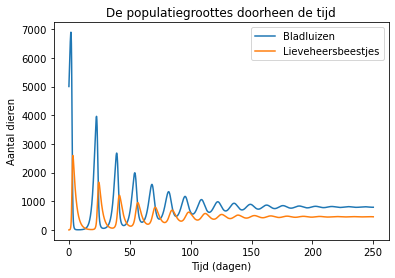

In [14]:
# bereken de functiewaarden met de methode van Euler
t_data, y_1_data, y_2_data = methode_van_euler(groei_bladluizen, groei_lieveheersbeestjes, 5000, 2, 250, 0.001)

# maak een nieuwe grafiek aan
plt.figure()

# plot de populatiegroottes als een functie van de tijd
plt.plot(t_data, y_1_data, label="Bladluizen")
plt.plot(t_data, y_2_data, label="Lieveheersbeestjes")

# breng verduidelijkende labels aan
plt.xlabel("Tijd (dagen)")
plt.ylabel("Aantal dieren")

# voeg een legende toe
plt.legend()

# voeg een titel toe
plt.title("De populatiegroottes doorheen de tijd")

# toon de grafiek
plt.show()

Je stelt een zeker periodiciteit vast! Telkens wanneer het aantal bladluizen stijgt, stijgt het aantal lieveheersbeestjes met een zekere vertraging mee. Beide aantallen lijken na verloop van tijd te convergeren. Deze convergentie kan je plotten met een fasediagram, waarin je het aantal lieveheersbeestjes uitzet in relatie tot het aantal bladluizen:

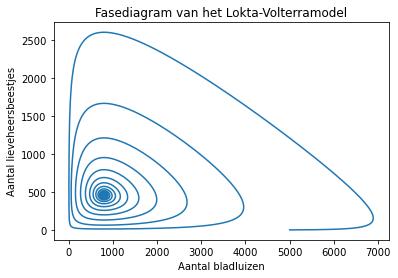

In [15]:
# maak een nieuwe grafiek aan
plt.figure()

# plot alle punten, waarbij y_1 geplot wordt op de x-as en y_2 op de y-as
plt.plot(y_1_data, y_2_data)

# breng verduidelijkende labels aan
plt.xlabel("Aantal bladluizen")
plt.ylabel("Aantal lieveheersbeestjes")

# voeg een titel toe
plt.title("Fasediagram van het Lokta-Volterramodel")

# toon de grafiek
plt.show()

### Opdracht 5

Je stelt vast dat de populatiegroottes convergeren naar een evenwichtspunt. Het aantal bladluizen en lieveheersbeestjes in evenwicht kan berekend worden door de groei van beide populatiegroottes gelijk te stellen aan 0, waarbij $y_1 \neq 0$ en $y_2 \neq 0$. Je moet met andere woorden het volgende stelsel oplossen:

\begin{cases}
    \dot{y_1} = (a - 1) y_1 \left(1 - \frac{y_1}{K}\right) - 0.0012 y_1 y_2 = 0 \\
    \dot{y_2} = -0.4 y_2 + 0.0005 y_1 y_2 = 0 \\
    y_1 \neq 0 \\
    y_2 \neq 0
\end{cases}

Ga er hierbij van uit dat $a = 1.6$, $K = 10000$. Welke waarden bekom je dan voor $y_1$ en $y_2$?

$$
\begin{cases}
    \dot{y_1} = (a - 1) y_1 \left(1 - \frac{y_1}{K}\right) - 0.0012 y_1 y_2 = 0 \\
    \dot{y_2} = -0.4 y_2 + 0.0005 y_1 y_2 = 0 \\
    y_1 \neq 0 \\
    y_2 \neq 0
\end{cases}
\Rightarrow
\begin{cases}
    -0.4 + 0.0005 y_1 = 0 \\
    0.6 \left(1 - \frac{y_1}{10000}\right) - 0.0012 y_2 = 0
\end{cases}
\Rightarrow
\begin{cases}
    y_1 = \frac{0.4}{0.0005} = 800 \\
    0.0012 y_2 = 0.6 \left(1 - \frac{y_1}{10000}\right)
\end{cases}
$$
$$
\Rightarrow
\begin{cases}
    y_1 = 800 \\
    0.0012 y_2 = 0.6 \left(1 - \frac{800}{10000}\right)
\end{cases}
\Rightarrow
\begin{cases}
    y_1 = 800 \\
    y_2 = \frac{0.552}{0.0012} = 460
\end{cases}
$$

### Opdracht 6

Gebruik enkel de resultaten voor de populatiegroottes in de laatste 100 van de 250 beschouwde dagen om een nieuw fasediagram van het Lokta-Volterramodel te genereren. Komen de evenwichtswaarden de je hierboven berekend hebt voor $y_1$ en $y_2$ overeen met deze die je visueel waarneemt?

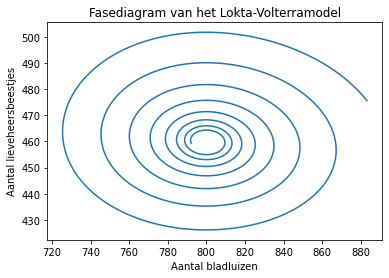

In [16]:
# maak een nieuwe grafiek aan
plt.figure()

# plot de populatiegroottes in de laatste 100 dagen, waarbij y_1 geplot wordt op de x-as en y_2 op de y-as
plt.plot(y_1_data[-100000:], y_2_data[-100000:])

# breng verduidelijkende labels aan
plt.xlabel("Aantal bladluizen")
plt.ylabel("Aantal lieveheersbeestjes")

# voeg een titel toe
plt.title("Fasediagram van het Lokta-Volterramodel")

# toon de grafiek
plt.show()

Stel vast dat er na verloop van tijd een evenwicht ontstaat, waarbij er 800 bladluizen en 460 lieveheersbeestjes aanwezig zijn in het biosysteem. Dit zorgt ervoor dat er aanzienlijk minder planten beschadigd worden dan wanneer er 10.000 bladluizen zijn, zodat gewassen volop kunnen bloeien!

## De insecten voorbij

In het voorbeeld hierboven zag je dat de populatiegrootte van zowel de bladluizen als de lieveheersbeestjes convergeert naar een evenwichtwaarde. In uitzonderlijke gevallen blijft de periodiciteit evenwel behouden, zodat schommelingen onverminderd verdergaan. Een gekend voorbeeld hiervan omvat de populatiegrootte van vossen (het roofdier) en konijnen (de prooi) in een bepaald gebied, waarbij volgende fasen periodiek doorlopen worden:

- Er zijn weinig vossen, waardoor er relatief weinig konijnen opgegeten worden; het aantal konijnen neemt toe
- Omdat er meer en meer konijnen zijn, is er meer voedsel voor de aanwezige vossen; het aantal vossen neemt toe
- Omdat er meer en meer vossen zijn, worder er meer konijnen gevangen en opgegeten; het aantal konijnen daalt
- Omdat er minder konijnen zijn, hebben de vossen steeds minder te eten; het aantal vossen daalt

Omdat het steeds over roofdieren en prooien gaat, worden modellen die de populatiegroottes beschrijven ook wel **jager-prooivergelijkingen** (Eng. *predator-prey equations*) genoemd.

### Opdracht 7

Implementeer twee functies `groei_prooien` en `groei_jagers` die de groei van beide populaties modeleren met behulp van de volgende differentiaalvergelijkinge, waarbij $x(t)$ de prooipopulatie en $y(t)$ de jagerpopulatie voorstelt:

$$\dot{x}(t) = \alpha x(t) - \beta x(t) y(t)$$

$$\dot{y}(t) = - \gamma x(t) + \delta x(t) y(t)$$

Gelijkaardig aan het voorbeeld van de luizen en de lieveheersbeestjes, werken beide populatiegroottes op elkaar in door middel van de parameters $\alpha$, $\beta$, $\gamma$ en $\delta$, die alle groter zijn dan 0:

- In het geval van de prooien zal de populatiegroei groter worden als de populatie groter is (meer afstammelingen), en zal deze afnemen als het aantal jagers groter wordt (meer opgegeten).

- In het geval van de jagers zal de populatiegroei afnemen naarmate er meer jagers zijn (meer competitie) en toenemen als het aantal prooien groter wordt (meer voedsel).

In [17]:
def groei_prooien(y_1, y_2, alpha=0.8, beta=1.2):
    return alpha * y_1 - beta * y_1 * y_2


def groei_jagers(y_1, y_2, gamma=0.4, delta=0.5):
    return - gamma * y_2 + delta * y_1 * y_2

### Opdracht 8

Gebruik nu de waarden $\alpha = 0.8$, $\beta = 1.2$, $\gamma = 0.4$ en $\delta = 0.5$, en vertrek van $x(0) = 0.9$ en $y(0) = 0.4$ (waarden die vermenigvuldigd kunnen worden met een constante factor om de werkelijke populatiegrootte in een gegeven natuurgebied te beschrijven). Plot de populatiegrootte doorheen de tijd met een tussenstap van 0.001. Wat stel je vast?

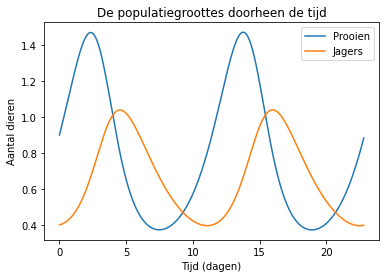

In [18]:
t_data, y_1_data, y_2_data = methode_van_euler(groei_prooien, groei_jagers, 0.9, 0.4, 22.8, 0.001)
plt.figure()
plt.plot(t_data, y_1_data, label="Prooien")
plt.plot(t_data, y_2_data, label="Jagers")
plt.xlabel("Tijd (dagen)")
plt.ylabel("Aantal dieren")
plt.legend()
plt.title("De populatiegroottes doorheen de tijd")
plt.show()

Als alles goed is, zou je een periode van 11.4 dagen moeten zien optreden.

### Opdracht 9

Stel een fasediagram op van hetzelfde Lokta-Volterramodel, en stel vast dat er inderdaad periodiciteit optreedt!

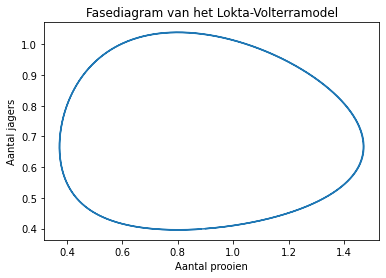

In [19]:
plt.figure()
plt.plot(y_1_data, y_2_data)
plt.xlabel("Aantal prooien")
plt.ylabel("Aantal jagers")
plt.title("Fasediagram van het Lokta-Volterramodel")
plt.show()

Het aantal prooien en jagers cirkelt als het ware omheen een evenwichtstoestand, die bereikt wordt wanneer de groei van beide populaties gelijk is aan 0:

$$\dot{x}(t) = \alpha x(t) - \beta x(t) y(t) = 0 \iff x(t) = 0 \lor y(t) = \frac{\alpha}{\beta}$$

$$\dot{y}(t) = - \gamma x(t) + \delta x(t) y(t) = 0 \iff y(t) = 0 \lor x(t) = \frac{\gamma}{\delta}$$

In het beschouwde geval wordt een evenwicht bereikt voor $x(t) = \frac{\gamma}{\delta} = 0.8$ en $y(t) = \frac{\alpha}{\beta} \approx 0.67$. Dit evenwicht wordt evenwel niet bereikt!

### Opdracht 10

Plot hetzelfde fasediagram nu met toevoeging van de rechten met vergelijking $x = 0{,}8$ en $y = 0{,}67$. Dit kan met behulp van volgende code:

```
plt.plot([0.8, 0.8], [0.3, 1.1])
plt.plot([0.3, 1.5], [0.67, 0.67])
```

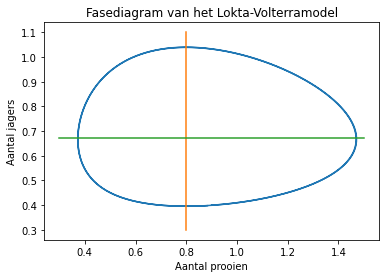

In [20]:
plt.figure()
plt.plot(y_1_data, y_2_data)
plt.plot([0.8, 0.8], [0.3, 1.1])
plt.plot([0.3, 1.5], [0.67, 0.67])
plt.xlabel("Aantal prooien")
plt.ylabel("Aantal jagers")
plt.title("Fasediagram van het Lokta-Volterramodel")
plt.show()

Je stelt vast dat deze twee rechten het fasediagram in vier delen verdelen. Deze vier delen komen overeen met de vier fasen die reeds eerder besproken werden:

- In het kwadrant linksonder daalt het aantal jagers, waardoor het aantal prooien stijgt
- In het kwadrant rechtsonder stijgt het aantal prooien, waardoor het aantal jagers stijgt
- In het kwadrant rechtsboven stijgt het aantal jagers, waardoor het aantal prooien daalt
- In het kwadrant linksboven daalt het aantal prooien, waardoor het aantal jagers daalt

Hiermee kan je deze lessenreeks afsluiten!